# ICESat GLAS Exercise
January 25, 2019  
UW CEWA599: Geospatial Data Analysis  
David Shean

## Objectives
1. Apply some of the core NumPy, Pandas, and Matplotlib functionality
2. Learn basic data manipulation and exploration with a relatively small, clean point dataset
3. Learn a bit more about the ICESat mission, the GLAS instrument, and laser altimetry

## Background
The NASA Ice Cloud and land Elevation Satellite ([ICESat](https://icesat.gsfc.nasa.gov/icesat/)) was a NASA mission carrying the Geosciences Laser Altimeter System (GLAS) instrument: a big ol' space laser, pointed down at the Earth (and unsuspecting Earthlings).  

It measured surface elevations by precisely tracking laser pulses emitted from the spacecraft at a rate of 40 Hz (a new pulse every 0.025 seconds).  These pulses traveled through the atmosphere, reflected off the surface, back up through the atmosphere, and into space, where some small fraction of that original energy was received by a large telescope on the spacecraft.  The instrument electronics precisely recorded the time when these intrepid photons left the instrument and when they returned.  The position and orientation of the spacecraft was precisely known, so the two-way traveltime (and assumptions about the speed of light and propagation through the atmosphere) allowed for precise forward determination of the spot on the Earth's surface (or cloud tops, as was often the case) where the reflection occurred.  The laser spot size varied during the mission, but was ~70 m in diameter. 

ICESat collected billions of measurements from 2003 to 2009, and was operating in a "repeat-track" mode that sacrificed spatial coverage for repeat observations along the same ground tracks over time.  One primary science focus involved elevation change over the Earth's ice sheets.  It allowed for early measurements of full Antarctic and Greenland ice sheet elevation change, which offered a detailed look at spatial distribution and rates of mass loss, and total ice sheet contributions to sea level rise.  

There were problems with the instrument during the mission, so it was operated in short campaigns lasting only a few months to prolong the full mission lifetime (and build a longer time series).  While the primary measurements focused on the polar regions, many measurements were also collected over lower latitudes, to meet other important science objectives (e.g., estimating biomass in the Earth's forests, observing sea surface height over time). 

## CONUS dataset
A few years ago, I wanted to evaluate ICESat coverage near glaciers in the Continental United States (CONUS).  I downloaded all of the GLAS shot data, and wrote a Python script to filter and process the data (the `glas_proc.py` script here [https://github.com/dshean/icesat_tools](https://github.com/dshean/icesat_tools))

These scripts produced a csv file `GLAH14_tllz_conus_lulcfilt_demfilt.csv` that contains ICESat shots that passed the following filters:
* Within some buffer (~110 km) of mapped glacier polygons from the Randolph Glacier Inventory (RGI)
* Returns from exposed (bare) ground (31) or snow/ice (12) according to on a 30-m NLCD Land-use/Land-cover dataset
* Elevation values within some threshold (200 m, I believe) of elevations from an external reference DEM (void-filled 1/3-arcsec (30-m) SRTM-GL1), used to remove spurious points and returns from clouds.
* Various other ICESat-specific quality flags

The final file contains a very small subset of the total shots in the raw data.  The remaining points should represent returns from the Earth's surface with reasonably high quality, and can be used for subsequent analysis.

# Instructions
1. Take a look at the `GLAH14_tllz_conus_lulcfilt_demfilt.csv` file on the command line (use `less` or `more`)
2. Note the structure, header on the first line: `decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc`
3. Fill in the notebook:  
    3.1 Play around with the data in NumPy (first half)  
    3.2 Play around with the data in Pandas (second half)  
    3.3 Generate some plots with Matplotlib (both)  
4. Prepare a separate markdown file with basic overview of your project idea
5. Add and commit the notebook and project file

# Initial setup

In [1]:
#Magic function to enable interactive plotting in Jupyter notebook
#Allows you to zoom/pan within plots after generating
#Normally, this would be %matplotlib notebook, but since we're using Juptyerlab, we need a different widget
#%matplotlib notebook
%matplotlib inline

In [2]:
#Import necesary modules
#Use shorter names (np, pd, plt) instead of full (numpy, pandas, matplotlib.pylot) for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Increase figure size for inline
#plt.rcParams['figure.figsize'] = [8,8]

In [4]:
#The csv file containing ICESat shots (shouldn't need path if working with notebook in same directory)
fn = 'GLAH14_tllz_conus_lulcfilt_demfilt.csv'

# NumPy Exercises

# Load the file
* NumPy has some convenience functions for loading text files: loadtxt and genfromtxt
* Use loadtxt (simpler), but make sure you properly set the delimiter and handle the first row (see the skiprows option)
    * Can use the `np.loadtxt?` ipython lookup, or online documentation
* Store the NumPy array as variable called `glas_np`

In [5]:
glas_np = np.loadtxt(fn, delimiter=',', skiprows=1)

# How many records (individual ICESat shots) are there in your array?

In [6]:
glas_np.shape

(65236, 8)

## Examine the first 3 rows
* Use slicing
* Note that all values in the array have the same datatype (float64), which is the standard for NumPy arrays

In [7]:
glas_np[0:3]

array([[ 2.00313957e+03,  7.31266943e+05,  4.41578970e+01,
        -1.05356562e+02,  1.39851000e+03,  1.40052000e+03,
         3.30000000e-01,  3.10000000e+01],
       [ 2.00313957e+03,  7.31266943e+05,  4.41501750e+01,
        -1.05358116e+02,  1.38711000e+03,  1.38464000e+03,
         4.30000000e-01,  3.10000000e+01],
       [ 2.00313957e+03,  7.31266943e+05,  4.41486320e+01,
        -1.05358427e+02,  1.39283000e+03,  1.38349000e+03,
         2.80000000e-01,  3.10000000e+01]])

## Examine the column with glas_z values
* You will need to figure out which column number corresponds to these values, then slice the array to return all rows, but only that column

In [8]:
glas_np[:,4]

array([1398.51, 1387.11, 1392.83, ..., 1556.19, 1556.18, 1556.32])

## Compute the mean and standard deviation of the glas_z values

In [9]:
print(glas_np[:,4].mean())
print(glas_np[:,4].std())

1791.4941674842112
1037.1755321331423


# Create a Matplotlib scatter plot of the glas_z values
* Make sure your x and y coordinates are defined properly
* Use point color to represent the elevation

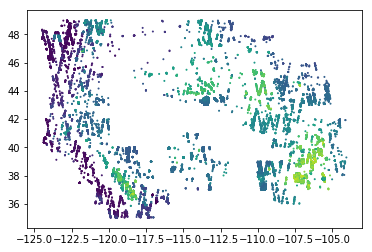

In [10]:
f = plt.figure()
x=glas_np[:,3]
y=glas_np[:,2]
z=glas_np[:,4]
plt.scatter(x,y,c=z,s=1)

## Create an interactive 3D scatterplot
* https://matplotlib.org/2.1.1/gallery/mplot3d/scatter3d.html
* Use glas_z for the z values and also the point colors

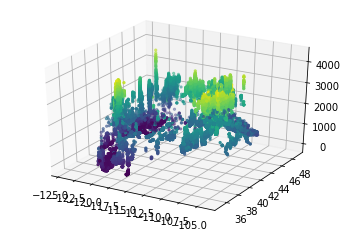

In [11]:
from mpl_toolkits.mplot3d import Axes3D
f = plt.figure()
ax3D = f.add_subplot(111, projection='3d')
sc = ax3D.scatter(x, y, z, c=z, marker='.')

# Use conditionals and fancy indexing to extract points from 2003
* Design a "filter" to isolate the points from 2003
    * Can use boolean indexing
    * Can use bitwise operator `&` to combine two boolean arrays
    * Can extract values from original array using the final boolean index
* Create a new NumPy array to store these points
* How many points were acquired in 2003?

In [12]:
#idx = (glas_np[:,0] >= 2003.) & (glas_np[:,0] < 2004.)
#glas_np_2003 = glas_np[idx]

In [13]:
glas_np_2003 = glas_np[np.floor(glas_np[:,0]) == 2003]

In [14]:
glas_np_2003.shape

(10291, 8)

# Get the number of shots for each year
* Programatically determine a set of unique years
* Get the shot count for each year (using similar approach as previous question)
* Calculate mean and standard deviation of the glas_z elevations for each year
* Print using string formatting, limiting elevations to to 1 decimal place (e.g. '2003 10291 1669.6 992.0')

In [15]:
#years = list(set(glas_np[:,0].astype('int')))
years = np.unique(glas_np[:,0].astype('int'))

In [16]:
years

array([2003, 2004, 2005, 2006, 2007, 2008, 2009])

In [17]:
year_counts = []
for y in years:
    idx = (glas_np[:,0] >= y) & (glas_np[:,0] < y+1)
    gy = glas_np[idx]
    year_counts.append(gy.shape[0])
    print('%i %i %0.1f %0.1f' % (y, gy.shape[0], gy[:,4].mean(), gy[:,4].std()))

2003 10291 1669.6 992.0
2004 11519 1828.4 1020.3
2005 13122 1840.7 1053.3
2006 12283 1898.0 1046.2
2007 8516 1831.0 1054.2
2008 6668 1766.7 1082.0
2009 2837 1335.0 805.0


## Create a Matplotlib bar graph for the number of shots in each year
* Use black bars instead of the default blue
* Label the x and y axes
* Add a title

Text(0, 0.5, 'Count')

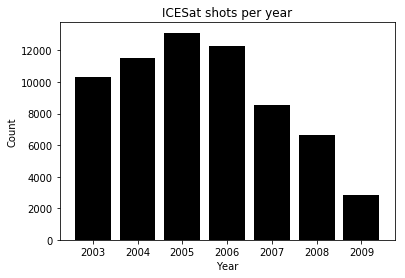

In [18]:
plt.figure()
plt.bar(years, year_counts, color='k')
plt.title('ICESat shots per year')
plt.xlabel('Year')
plt.ylabel('Count')




# Pandas
* A better way to deal with tabular data
* With NumPy, we had to remember which column represented which variable (lat, lon, glas_z, etc)
* Pandas allows you to store data with different types, and then reference using more meaningful labels
    * With NumPy: `glas_np[:,4]`
    * with Pandas: `glas_df['glas_z'] 
* A good "10-minute" reference with examples: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

## Load the csv file into a Pandas DataFrame named glas_df

In [19]:
#glas_df = pd.read_csv(fn, names=['decyear','ordinal','lat','lon','glas_z','dem_z','dem_z_std','lulc'])
glas_df = pd.read_csv(fn)

## Inspect the DataFrame
* Can use hea

In [20]:
glas_df.head()
glas_df.tail()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.0,31
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.0,31
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.0,31
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.0,31
65235,2009.775995,733691.238341,37.902420,-117.045508,1556.32,1556.44,0.0,31


## Check the data types for each column

In [21]:
glas_df.dtypes

decyear      float64
ordinal      float64
lat          float64
lon          float64
glas_z       float64
dem_z        float64
dem_z_std    float64
lulc           int64
dtype: object

## Do a quick inspection of the DataFrame with the describe() method

In [22]:
glas_df.describe()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
count,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000
mean,2005.945322,732291.890372,40.946798,-115.040612,1791.494167,1792.260964,5.504748,30.339444
std,1.729573,631.766682,3.590476,5.465065,1037.183482,1037.925371,7.518558,3.480576
min,2003.139571,731266.943345,34.999455,-124.482406,-115.550000,-114.570000,0.000000,12.000000
25%,2004.444817,731743.803182,38.101451,-119.257599,1166.970000,1168.240000,0.070000,31.000000
50%,2005.846896,732256.116938,39.884541,-115.686241,1555.730000,1556.380000,1.350000,31.000000
75%,2007.223249,732758.486046,43.453565,-109.816475,2399.355000,2400.072500,9.530000,31.000000
max,2009.775995,733691.238341,48.999727,-104.052336,4340.310000,4252.940000,49.900000,31.000000


## Get the number of shots

In [23]:
glas_df.shape[0]

65236

## Examine the glas_z column (DataSeries) from the larger DataFrame
* Compute the mean and standard deviation

In [24]:
print(glas_df['glas_z'].mean())
print(glas_df['glas_z'].std())

1791.494167484202
1037.1834816353876


## Use the Pandas plotting functionality to create a scatterplot of glas_z values
* Note that labels and colorbar are automatically plotted!
* Adjust the size of the points using the `s=1` keyword
* Experiment with color ramps and pick one that you like:
    * https://matplotlib.org/examples/color/colormaps_reference.html (I prefer `inferno`)

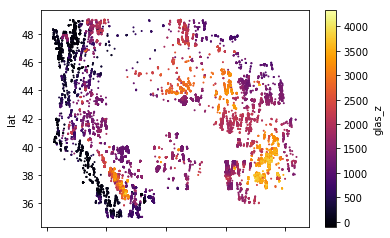

In [25]:
ax = glas_df.plot(x='lon', y='lat', kind='scatter', c='glas_z', s=1, cmap='inferno')

## Geographic coordinate sanity check
1. Any potential issues with the aspect ratio of this map?
2. What is the length (km) of a degree of latitude at 35° latitude?  49° latitude?
3. What is the length (km) of a degree of longitude at 35° latitude?  49° latitude?

Do some quick calculations for a spherical Earth (or more sophisticated geodetic distance calculation, if desired).  Drawing a little picture is likely useful as you attempt (no need to include here).

Create a plot of a function showing the length of a degree of longitude vs. latitude from 0 to 90 degrees latitude.  Add two red points for 35 and 49.

111.19492664455873
[91.08555148 72.9504356 ]


Text(0, 0.5, 'Length of Degree of Longitude (km)')

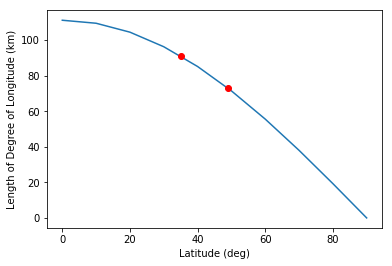

In [26]:
r = 6371
c = 2*np.pi*r

lat = np.array([35, 49])
lata = np.arange(0,91,10)

dlon = lambda lat : (c * np.cos(np.deg2rad(lat)))/360.
dlat = c/360

print(dlat)
print(dlon(lat))

f,ax = plt.subplots()
ax.plot(lata, dlon(lata))
ax.plot(lat, dlon(lat), 'ro')
ax.set_xlabel('Latitude (deg)')
ax.set_ylabel('Length of Degree of Longitude (km)')

## Create a histogram of all glas_z elevation values
* Make sure that you use enough bins to avoid aliasing (might require some trial and error)
    * Compare with some of the options (e.g., 'auto') here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges
* What do you note about the distribution?
* Any negative values?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3371fffd68>]],
      dtype=object)

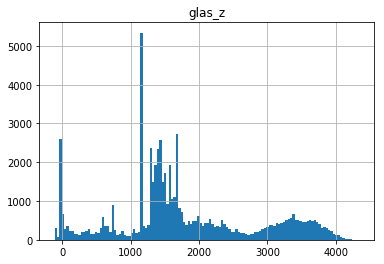

In [27]:
glas_df.hist('glas_z', bins=128)

## Wait a minute...negative elevations!?  Who calibrated this thing? C'mon NASA.
* How many shots have a negative glas_z value?
* Create a scatterplot to see their spatial distribution
* Adjust the color ramp bounds to bring out more detail (hint: see vmin and vmax arguments for plot())
* Plot the 'dem_z' values extracted from the SRTM dataset - how do these compare?
* What do you think might be going on here?

(3100, 8)


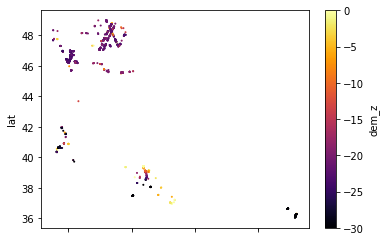

In [28]:
glas_df_neg = glas_df[glas_df['glas_z'] < 0]
print(glas_df_neg.shape)
ax = glas_df_neg.plot(x='lon', y='lat', kind='scatter', c='dem_z', s=1, cmap='inferno', vmin=-30, vmax=0)

## Compute the difference between ICESat glas_z and SRTM dem_z values
* Store as a new column in the DataFrame
* Remember the order of this calculation (if output difference values are negative, which dataset is higher?)

In [29]:
glas_df['glas_dem_diff'] = glas_df['glas_z'] - glas_df['dem_z']

## Create a scatterplot of the differences
* Use the `cmap='RdBu'` for this
* Adjust the min and max of your color ramp to be symmetrical about 0 with appropriate range to bring out detail in spatial distribution

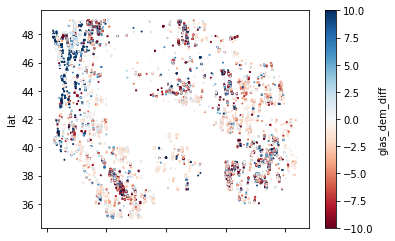

In [30]:
ax = glas_df.plot(x='lon', y='lat', kind='scatter', c='glas_dem_diff', s=1, cmap='RdBu', vmin=-10, vmax=10)

## Create a histogram of the difference values
* Limit the range to something reasonable (probably also want to increase number of bins)

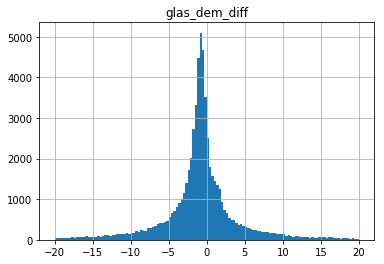

In [31]:
out = glas_df.hist('glas_dem_diff', bins=128, range=(-20,20))

## Compute the mean, median and standard deviatoin of the differences

In [32]:
print(glas_df['glas_dem_diff'].mean())
print(glas_df['glas_dem_diff'].median())
print(glas_df['glas_dem_diff'].std())

-0.7667968606291169
-0.7999999999999545
12.36334152209583


## Apply a simple absolute difference filter to remove gross outliers with differences greater than 30 m
* Store the result in a new Dataframe
* How many shots survived (passed)?

In [33]:
idx = glas_df['glas_dem_diff'].abs() <= 30
glas_df_fltr = glas_df[idx]
print(glas_df.shape)
print(glas_df_fltr.shape)

(65236, 9)
(64083, 9)


## Recompute mean, median and standard deviation
* Note how your values changed

In [34]:
print(glas_df_fltr['glas_dem_diff'].mean())
print(glas_df_fltr['glas_dem_diff'].median())
print(glas_df_fltr['glas_dem_diff'].std())

-0.919881871947333
-0.790000000000191
5.972255481197134


## Active remote sensing sanity check
* Do you see a systematic difference between the glas_z and dem_z values?
* Any clues from the scatterplot? (e.g., do some tracks (north-south lines of points) display systematic bias?)
* Brainstorm some ideas about what might be going on here.  Think about the nature of each sensor:
    * ICESat was a green laser (532 nm wavelength) with a big spot (~70 m in diameter)
    * SRTM was a C-band radar (5.3 GHz, 5.6 cm wavelength) with approximately 30 m ground sample distance (pixel size)
    * Consider different surfaces and how the laser/radar footprint might be affected:
        * Flat bedrock surface?
        * Dry sand dunes?
        * Steep montain topography like the Front Range in Colorado?  
        * Dense vegetation of the Hoh Rainforest in Olympic National Park?
* There are no "right" answers, and you don't need to write a long response (unless you want to) - I just wanted you to start thinking about the physical measurements

## Let's check to see if differences are due to our land-use/land-cover classes
* Find unique values in the 'lulc' column (hint: see the value_counts() method for a Pandas DataSeries)
* Remember that I initially preserved only two classes (12 - snow/ice, 31 - barren land), so this isn't going to help us over forests
    * https://www.mrlc.gov/data/legends/national-land-cover-database-2011-nlcd2011-legend

In [35]:
glas_df['lulc'].value_counts()

31    62968
12     2268
Name: lulc, dtype: int64

## Use Pandas groupby to compute stats for the LULC classes
* This is one of the most powerful features in Pandas, efficient grouping and analysis based on some values
* Compute mean, median and std of the difference values (glas_z - dem_z) for each LULC class
* Do you see a difference between values over glaciers vs bare rock?

In [36]:
glas_df[['glas_dem_diff', 'lulc']].groupby('lulc').agg(['mean', 'std', 'median', 'mad'])

glas_dem_diff                            
              mean        std median       mad
lulc                                          
12       -2.039493  14.920269 -0.965  8.159200
31       -0.720957  12.258978 -0.800  4.499198

In [ ]:
glas_df_fltr[['glas_dem_diff', 'lulc']].groupby('lulc').agg(['mean', 'std', 'median', 'mad'])

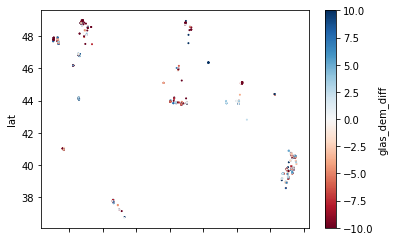

In [48]:
ax = glas_df[glas_df['lulc'] == 12].plot(x='lon', y='lat', kind='scatter', c='glas_dem_diff', s=1, cmap='RdBu', vmin=-10, vmax=10)

# Create a histogram that shows the number of points over time (decyear)
* How many distinct campaigns were there during the mission? Note: you will need smaller bins to properly resolve

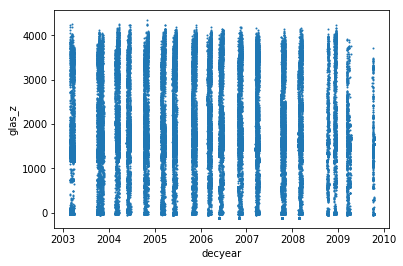

In [39]:
glas_df.plot(x='decyear', y='glas_z', kind='scatter', s=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f336cb8af60>]],
      dtype=object)

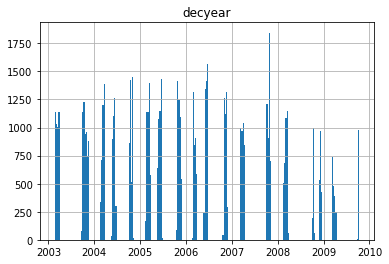

In [40]:
glas_df.hist('decyear', bins=256)

# Extra credit

1. Groupby year  
    * See if you can use Pandas groupby to reproduce your NumPy histogram showing number of shots for each year
    * Will likely need to modify the decyear values (see int(floor())), or parse the Python time ordinals
        * Can create a new column with integer year, then groupby that column
        * Or, use lambda function  

Text(0, 0.5, 'count')

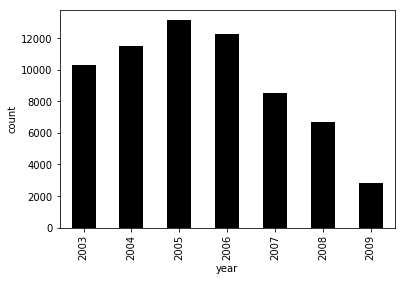

In [41]:
glas_df['year'] = glas_df['decyear'].apply(np.floor).astype(int)
fig = plt.figure()
ax = glas_df.groupby(['year'])['glas_z'].count().plot(kind='bar',color='k')
ax.set_xlabel('year')
ax.set_ylabel('count')

2. Cluster by campaign
    * See if you can create an algorithm to cluster the points by campaign
    * Compute the number of days and number of shots for each campaign
    * Compare your answer with metadata here: https://nsidc.org/data/icesat/laser_op_periods.html (remember that we are using a subset of points over CONUS, so your number of days might not match perfectly)

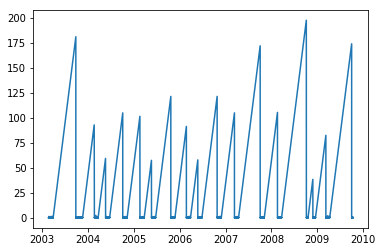

In [42]:
#diff_days = glas_df['ordinal'].diff().sort_values(ascending=False)
diff_days = glas_df['ordinal'].diff()
f, ax = plt.subplots()
ax.plot(glas_df['decyear'], diff_days)

In [43]:
from sklearn.cluster import KMeans

decyear = glas_df['decyear'].values.reshape(-1,1)
kmeans = KMeans(n_clusters=18)
kmeans.fit(decyear)
campaign_ind = kmeans.predict(decyear)

In [44]:
glas_df['campaign'] = campaign_ind

In [45]:
campaign_df = glas_df.groupby('campaign')['decyear'].agg(['min', 'max', 'count']).sort_values(by='min').reset_index(drop=True)
campaign_df['ndays'] = (campaign_df['max'] - campaign_df['min'])*365.25

In [46]:
campaign_df

,min,max,count,ndays
0,2003.139571,2003.239405,4317,36.464379
1,2003.734749,2003.881182,5974,53.484430
2,2004.135131,2004.219854,3645,30.945174
3,2004.382099,2004.470906,3600,32.436706
4,2004.757390,2004.854176,4274,35.351032
5,2005.131551,2005.225838,4418,34.438122
6,2005.383290,2005.473584,4313,32.979832
7,2005.805892,2005.894943,4391,32.525779
8,2006.145167,2006.235459,3672,32.978985
9,2006.394149,2006.483203,4567,32.526952


3. Create a plot with subplots showing scatterplots for each year and/or each campaign

# Project update

* Prepare a short paragraph or brief, high-level outline of your project idea(s), and mention any packages and/or datasets that look promising.  It's OK if you're still fuzzy on details, just give me a general sense of what you're thinking.  
* Add as a new markdown file to your Week03 github repo